In [3]:
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import sigpy as sp
import sigpy.plot as pl
from warnings import warn
import epgtorch as epg
%matplotlib notebook

In [5]:
T1_mapping = np.load("DictionaryAndSequenceInfo/T1_mapping.npy")
T2_mapping = np.load("DictionaryAndSequenceInfo/T2_mapping.npy")
pd_mapping = np.load("DictionaryAndSequenceInfo/pd_mapping.npy")

In [6]:
TE = 15
TR = 450

angle_ex = 90
# angles = torch.tensor([69.]).cuda()
angles = torch.tensor([69.])

ETL = 1

# angle_ex_rad = torch.tensor(np.pi/180. * angle_ex).cuda()
# angles_rad = torch.tensor(np.pi/180. * angles).cuda()

angle_ex_rad = torch.tensor(np.pi/180. * angle_ex)
angles_rad = torch.tensor(np.pi/180. * angles)

In [7]:
# T1_mapping = torch.tensor(T1_mapping).cuda()
# T2_mapping = torch.tensor(T2_mapping).cuda()
# T1w_fp_epg = torch.zeros(T1_mapping.shape).cuda()

T1_mapping = torch.tensor(T1_mapping)
T2_mapping = torch.tensor(T2_mapping)
T1w_fp_epg = torch.zeros(T1_mapping.shape)

In [8]:
for i in range(320):
    print(i)
    for j in range(320):
        T1 = T1_mapping[i,j]
        T2 = T2_mapping[i,j]
        T1w_fp_epg[i,j] = epg.SE_sim(angle_ex_rad, angles_rad, TE, T1, T2, TR, B1=1.)[0]
        break
    break

0
tensor([[ 0.2499,  0.0430,  0.5289],
        [ 0.2499,  0.0000,  0.0000],
        [ 0.0699, -0.3905,  0.0000]], dtype=torch.float64)


/home/kewang/MRF_cs294/Pytorch-UNet/Fingerprinting/epgtorch.py:68: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  alpha = alpha[0]


In [9]:
T2_mapping

tensor([[60., 60., 60.,  ..., 60., 60., 60.],
        [60., 60., 60.,  ..., 60., 60., 60.],
        [60., 60., 60.,  ..., 60., 60., 60.],
        ...,
        [60., 60., 60.,  ..., 60., 60., 60.],
        [60., 60., 60.,  ..., 60., 60., 60.],
        [60., 60., 60.,  ..., 60., 60., 60.]], dtype=torch.float64)

In [7]:
pd_mapping = np.load("DictionaryAndSequenceInfo/pd_mapping.npy")

<IPython.core.display.Javascript object>


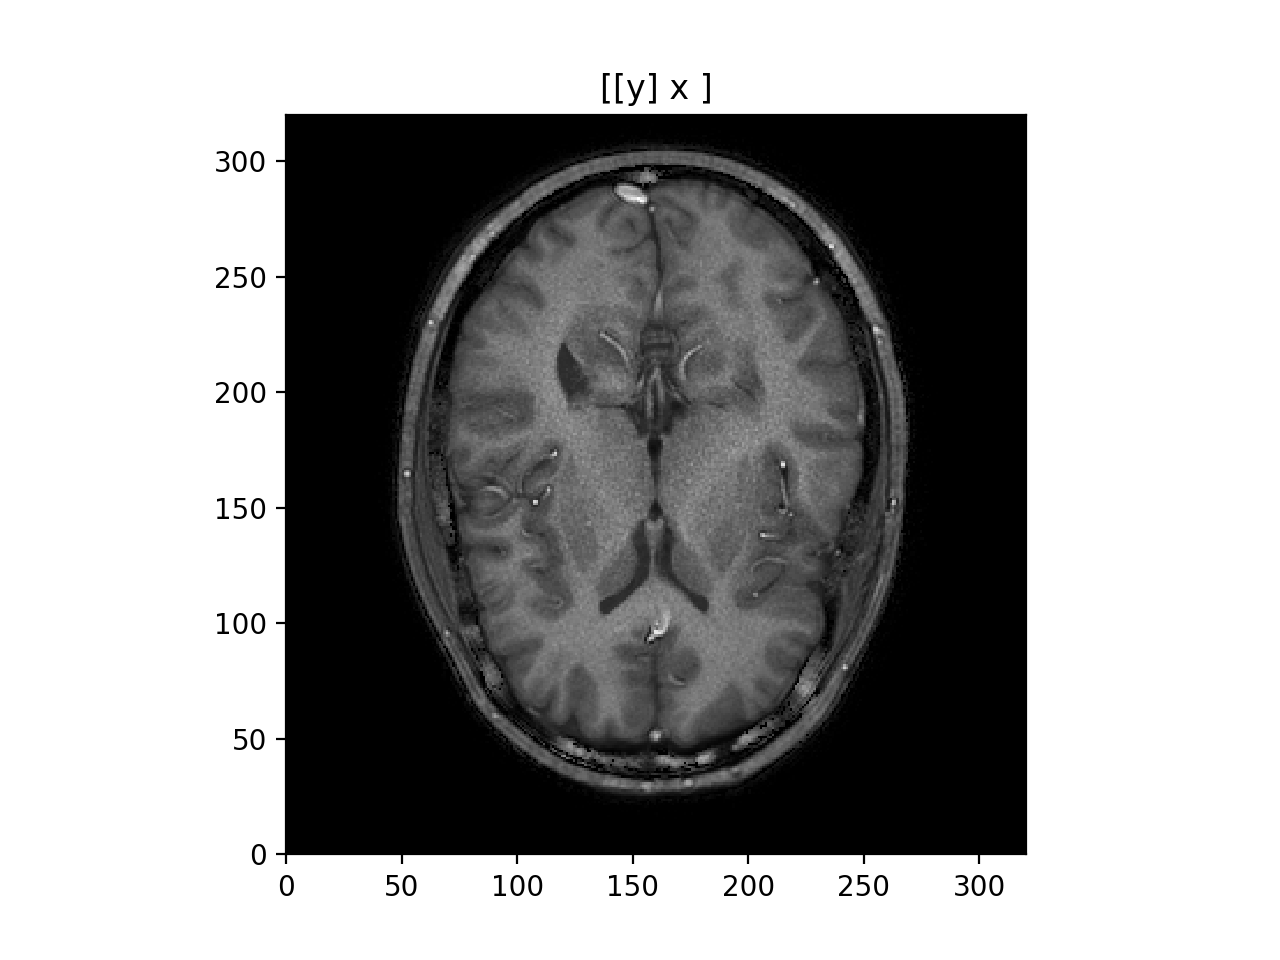

In [8]:
pl.Image(T1w_fp_epg.data.cpu().numpy()*pd_mapping)

In [442]:
T1w_fp_epg = SE_sim(angle_ex_rad, angles_rad, TE, T1_mapping, T2_mapping, TR, B1=1.)[0]

/home/kewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0687, 0.0687, 0.0687,  ..., 0.0687, 0.0687, 0.0687]])


In [435]:
T1w_fp_epg.numpy().max()

0.0

In [427]:
T1_mapping.max()

tensor(2960., dtype=torch.float64)

In [420]:
pl.Image(T1w_fp_epg)

AttributeError: 'Tensor' object has no attribute 'ndim'

In [276]:
T1_mapping.view(-1).shape[0]

102400

In [246]:
T1_mapping.shape

torch.Size([320, 320])